# Logistic Regression
<iframe src="https://giphy.com/embed/ekBEInfmgZ60Dn1X1r" width="480" height="250" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/yes-or-no-ekBEInfmgZ60Dn1X1r">via GIPHY</a></p>


Logistic regression is an excellent example of how we can leverage mathematics to create new models that behave differently. 

The goal of logistical regression is to categorize a data set into categories.

Lets do an example - lets say we have a made up data set of mice being classified as not obese and obese. This would 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 

In [2]:
# Generate Random Weights between 2 grams and 20 grams
weight = np.random.uniform(20, 60, size=40) 
weight.sort(0)

# Combine lengths and weights into a 2D NumPy array
mice_np = np.array(weight)
mice_dataset = pd.DataFrame(mice_np)
mice_dataset.columns = ["Weight"]
print(mice_dataset)

       Weight
0   20.850779
1   21.489993
2   22.549661
3   24.355673
4   24.679644
5   24.720106
6   25.715983
7   25.943912
8   26.084620
9   29.079919
10  29.229121
11  29.890498
12  30.052020
13  31.122764
14  31.494856
15  31.876227
16  32.124948
17  34.519345
18  34.525337
19  34.623508
20  36.701255
21  38.055439
22  38.673455
23  38.821959
24  41.396955
25  42.379564
26  43.961415
27  45.347453
28  47.029522
29  47.249361
30  52.693384
31  53.469178
32  53.725014
33  54.396693
34  55.169714
35  55.203157
36  55.712879
37  56.472884
38  56.933075
39  56.949042


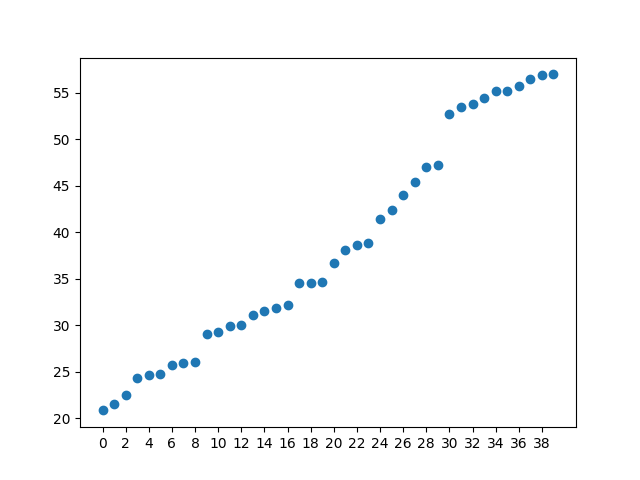

In [3]:
plt.figure()
plt.plot(mice_dataset, 'o')
plt.xticks(mice_dataset.index[::2])
plt.show()

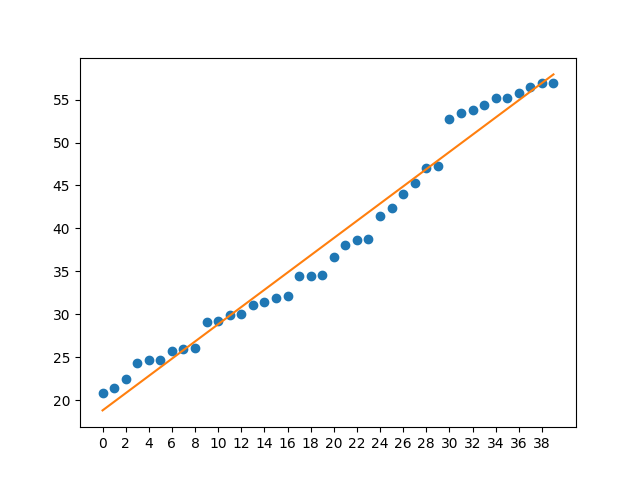

In [4]:
linear_regression_model = LinearRegression()
linear_regression_model.fit( np.array(mice_dataset.index).reshape(-1, 1), mice_dataset.values)

lin_y_hat = linear_regression_model.coef_[0] * np.arange(0, len(mice_dataset)) + linear_regression_model.intercept_
plt.figure()
plt.plot(mice_dataset, "o", mice_dataset.index, lin_y_hat)
plt.xticks(mice_dataset.index[::2])
plt.show()


Obese Weight [36.70125518]
    Weight
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     1.0
37     1.0
38     1.0
39     1.0


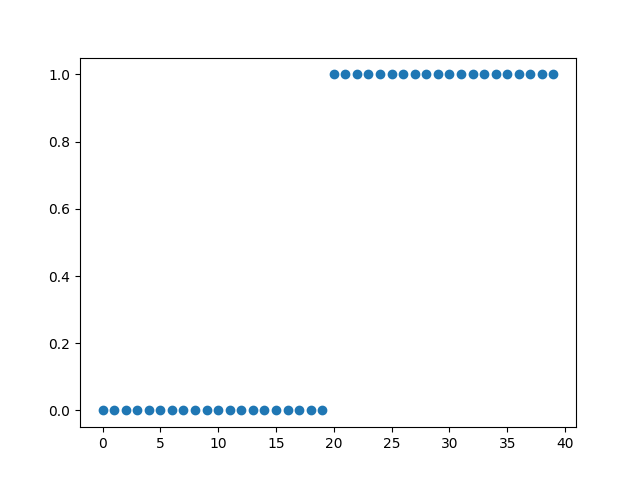

In [5]:
seventy_fifth_percentile = int(len(mice_dataset)*2/4)
obese_weight = mice_dataset.values[seventy_fifth_percentile]
print("Obese Weight", obese_weight)
obese_mice_dataset = mice_dataset.__deepcopy__()
obese_mice_dataset[obese_mice_dataset<obese_weight] = 0
obese_mice_dataset[obese_mice_dataset>=obese_weight] = 1
print(obese_mice_dataset)
plt.figure()
plt.plot(obese_mice_dataset, "o")
plt.show()

[0. 0. 0. 0.]
[[9.99999994e-01 6.39641279e-09]
 [9.99999986e-01 1.41663968e-08]
 [9.99999947e-01 5.29326805e-08]
 [9.99999500e-01 5.00479600e-07]]
[[9.99999994e-01 6.39641279e-09]
 [9.99999986e-01 1.41663968e-08]
 [9.99999947e-01 5.29326805e-08]
 [9.99999500e-01 5.00479600e-07]
 [9.99999251e-01 7.48867195e-07]
 [9.99999212e-01 7.87523691e-07]
 [9.99997282e-01 2.71810315e-06]
 [9.99996391e-01 3.60910558e-06]
 [9.99995701e-01 4.29946152e-06]
 [9.99821561e-01 1.78438829e-04]
 [9.99785179e-01 2.14821139e-04]
 [9.99511062e-01 4.88937953e-04]
 [9.99402325e-01 5.97675415e-04]
 [9.97739571e-01 2.26042941e-03]
 [9.96413847e-01 3.58615254e-03]
 [9.94249412e-01 5.75058808e-03]
 [9.92180586e-01 7.81941444e-03]
 [8.65860324e-01 1.34139676e-01]
 [8.64992322e-01 1.35007678e-01]
 [8.50085469e-01 1.49914531e-01]
 [2.99581257e-01 7.00418743e-01]
 [7.35225910e-02 9.26477409e-01]
 [3.54833707e-02 9.64516629e-01]
 [2.96760022e-02 9.70323998e-01]
 [1.24124708e-03 9.98758753e-01]
 [3.65934723e-04 9.99634065e

c:\Users\trent\Documents\DSC412\units\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\trent\Documents\DSC412\units\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


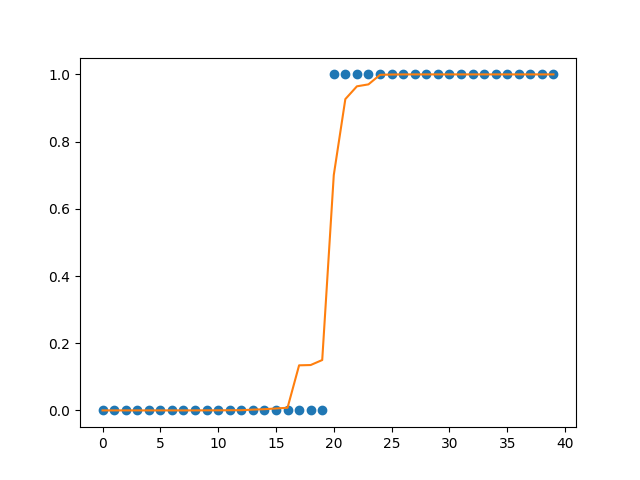

In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(mice_dataset, obese_mice_dataset)
result = logistic_model.predict(mice_dataset[:4])
prob = logistic_model.predict_proba(mice_dataset[:4])
print(result)
print(prob)
all_mice_prob = logistic_model.predict_proba(mice_dataset.values)
print(all_mice_prob)
plt.figure()
plt.plot(obese_mice_dataset, 'o', all_mice_prob[:, 1])
plt.show()

# We are actually leveraging the sigmoid function here!



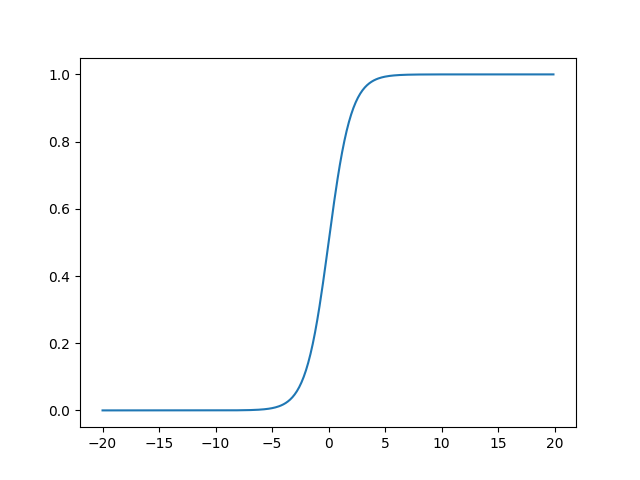

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

count = np.arange(-20, 20, 0.1)
out = sigmoid(count)
plt.figure()
plt.plot(count, out)
plt.show()


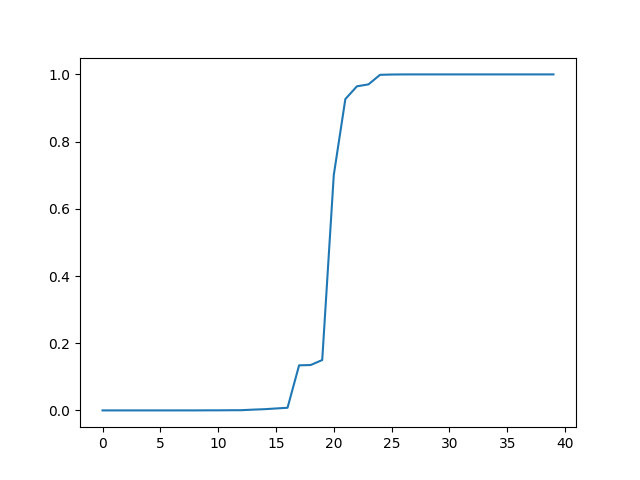

In [12]:
y = logistic_model.coef_[0] * mice_dataset + logistic_model.intercept_
lin_reg_out = sigmoid(y)
plt.figure()
plt.plot(mice_dataset.index, lin_reg_out)
plt.show()


## A more complex example

Here we have a popular data set that contains the following:
1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width
5. Class - Iris Setosa, Iris Versicolour, or Iris Virginica

X will contain the first 4 values, this will be our collected data
y is the output class

Lets try to use logistic regression to see if we can predict the class of a new iris given its data.


In [13]:
# Import the method to load the iris data
from sklearn.datasets import load_iris

# Load the Iris Data
X, y = load_iris(return_X_y=True)

# Split the data into training and test sets, shuffle the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=.25, shuffle=True)
print("Model Classification:\n", y_train)

Model Classification:
 [2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2 2
 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0 0 1 0 0 2 1 0 0
 0 1 0 1 0 1 2 0 1 1 2 0 2 0 1 1 2 2 0 1 2 2 1 1 2 0 2 0 0 1 0 2 2 2 1 0 2
 0]


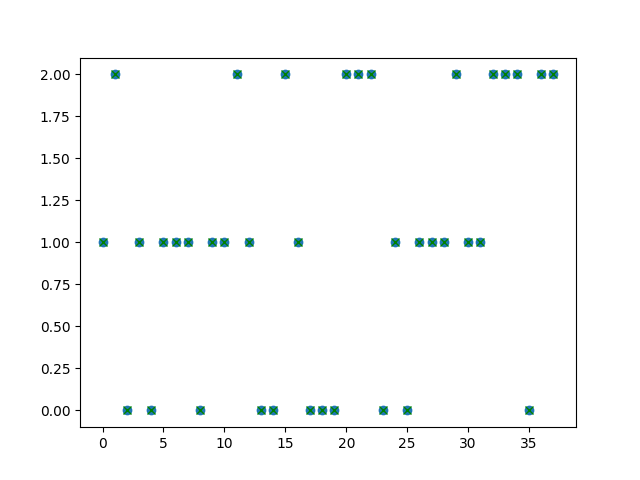

Mean Accuracy 0.98


In [14]:
# Fit the training data to train the model
iris_log_model = LogisticRegression(random_state=0).fit(X_train, y_train)
# Then use the data we did not use to train! 
y_out = iris_log_model.predict(X_test)

# Plot the Data and Compare
plt.figure()
plt.plot(pd.DataFrame(y_out), 'o', pd.DataFrame(y_test), 'gx')
plt.show()

print("Mean Accuracy", iris_log_model.score(X, y))


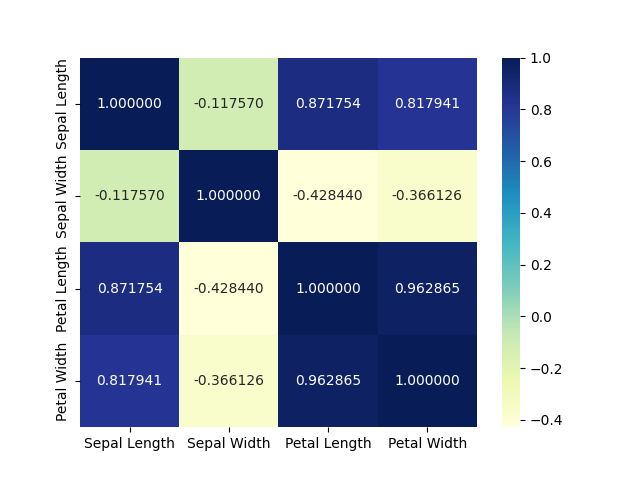

In [24]:
import seaborn as sns

iris_stats_df = pd.DataFrame(X)
iris_stats_df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
plt.figure()
p1 = sns.heatmap(iris_stats_df.corr(), cmap="YlGnBu", annot=True, fmt="f")
plt.show()


In [29]:

sepal_data = iris_stats_df.loc[:, ["Sepal Length", "Sepal Width"]]
X_train, X_test, y_train, y_test

     Sepal Length  Sepal Width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]
